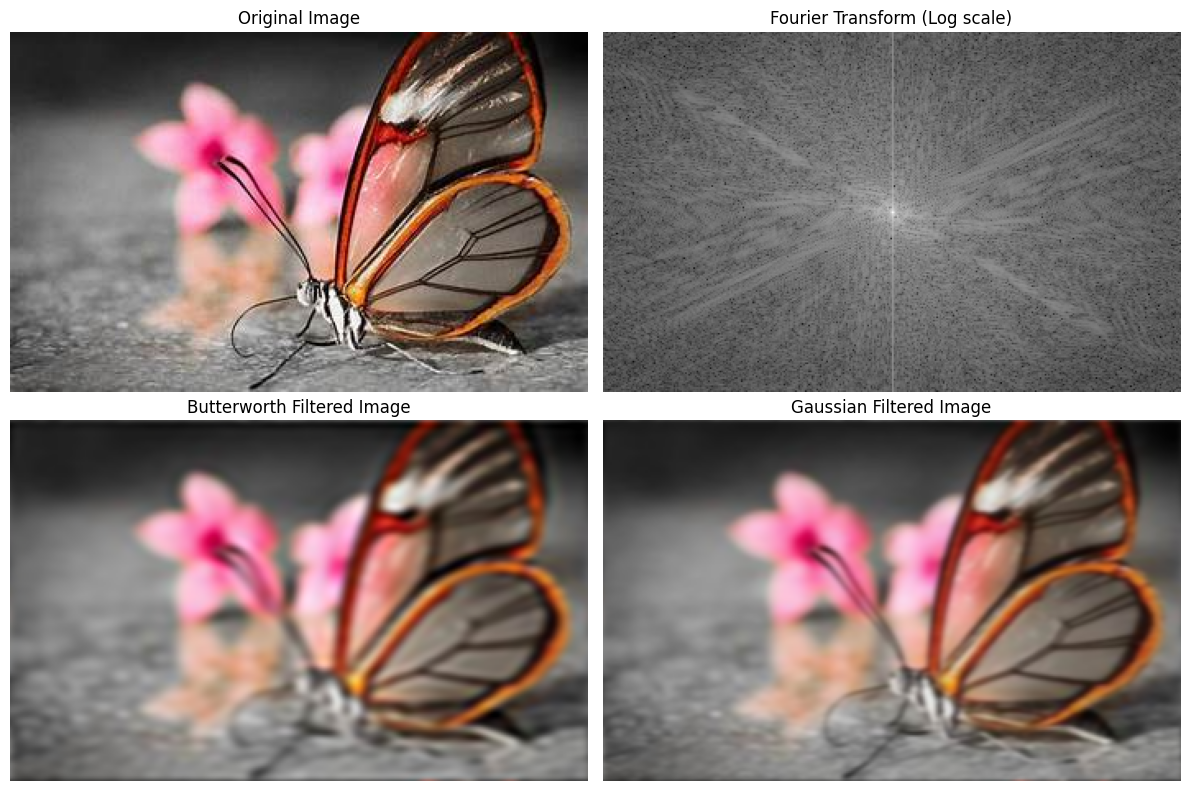

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply Butterworth filter
def butterworth_filter(shape, d0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.array([[(i - crow) ** 2 + (j - ccol) ** 2 for j in range(cols)] for i in range(rows)])
    butterworth = 1 / (1 + (u / d0 ** 2) ** (2 * n))
    return butterworth

# Function to apply Gaussian filter in frequency domain
def gaussian_filter_frequency(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.array([[(i - crow) ** 2 + (j - ccol) ** 2 for j in range(cols)] for i in range(rows)])
    gaussian = np.exp(-u / (2 * sigma ** 2))
    return gaussian

# Load the image in color
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

# Apply the Fourier Transform and filters to each color channel
def apply_filter_to_channel(img, filter_function, *args):
    f_transform = np.fft.fft2(img)
    f_transform_shift = np.fft.fftshift(f_transform)
    filter_mask = filter_function(img.shape, *args)
    f_filtered = f_transform_shift * filter_mask
    return np.fft.ifft2(np.fft.ifftshift(f_filtered)).real

# Create Butterworth and Gaussian filters for each channel
butter_filtered_img = np.zeros_like(img, dtype=np.float32)
gaussian_filtered_img = np.zeros_like(img, dtype=np.float32)

for channel in range(3):  # Apply to R, G, B channels separately
    butter_filtered_img[:, :, channel] = apply_filter_to_channel(img[:, :, channel], butterworth_filter, 30, 2)
    gaussian_filtered_img[:, :, channel] = apply_filter_to_channel(img[:, :, channel], gaussian_filter_frequency, 30)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
f_transform_shift = np.fft.fftshift(np.fft.fft2(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))
plt.imshow(np.log(1 + np.abs(f_transform_shift)), cmap='gray')
plt.title('Fourier Transform (Log scale)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.clip(butter_filtered_img, 0, 255).astype(np.uint8))
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.clip(gaussian_filtered_img, 0, 255).astype(np.uint8))
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
